In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../base_datos_2008.csv/base_datos_2008.csv")
df.dropna(inplace= True, subset= ["ArrDelay", "DepDelay", "Distance", "AirTime"])
sns.set(rc={"figure.figsize":(15,10)})

In [5]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)

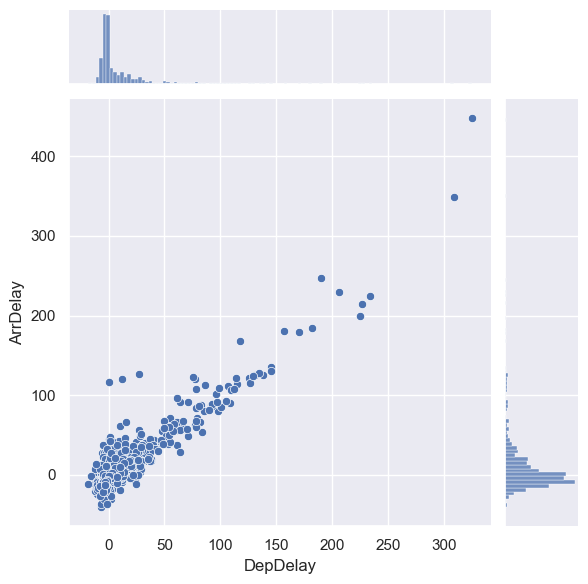

In [8]:
sns.jointplot(x=df2["DepDelay"], y=df2["ArrDelay"], kind="scatter")

In [9]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

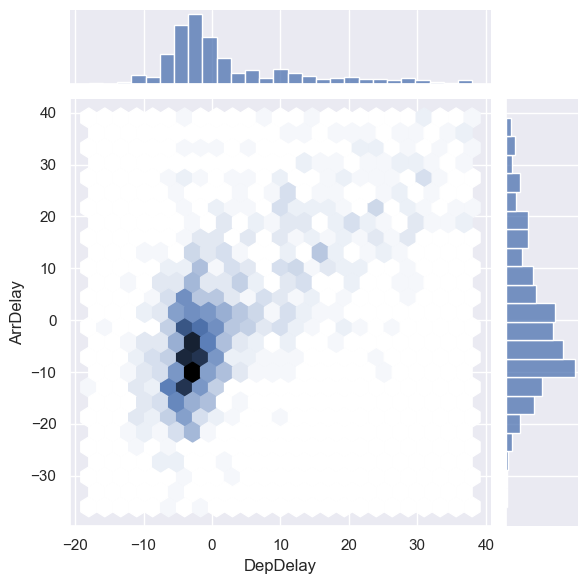

In [10]:
sns.jointplot(x=df3["DepDelay"], y=df3["ArrDelay"], kind="hex")

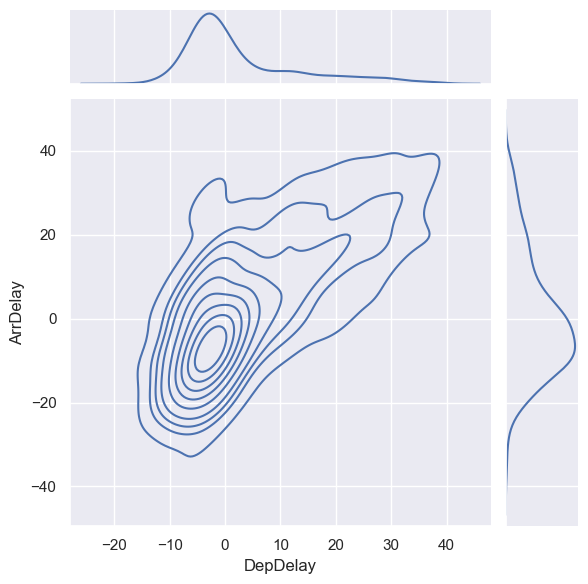

In [11]:
sns.jointplot(x=df3["DepDelay"], y=df3["ArrDelay"], kind="kde")

In [13]:
gb_df = pd.DataFrame(df2.groupby(["Origin", "Month"], as_index= False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,8.271429
1,ATL,2,17.254545
2,ATL,3,7.851852
3,ATL,4,18.920635
4,ATL,5,1.092308


In [14]:
data = gb_df.pivot("Month", "Origin", "DepDelay")
data

C:\Users\emida\AppData\Local\Temp\ipykernel_10036\2123281186.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = gb_df.pivot("Month", "Origin", "DepDelay")


Origin,ATL,HOU,IND
Month,,,
1,8.271429,5.444444,-0.833333
2,17.254545,26.642857,12.500000
3,7.851852,8.222222,2.250000
4,18.920635,14.000000,6.416667
5,1.092308,14.230769,11.062500
6,19.392405,28.900000,-4.142857
7,16.073529,4.166667,33.000000
8,10.723077,4.909091,-2.833333
9,0.400000,0.666667,20.250000


<AxesSubplot: xlabel='Origin', ylabel='Month'>

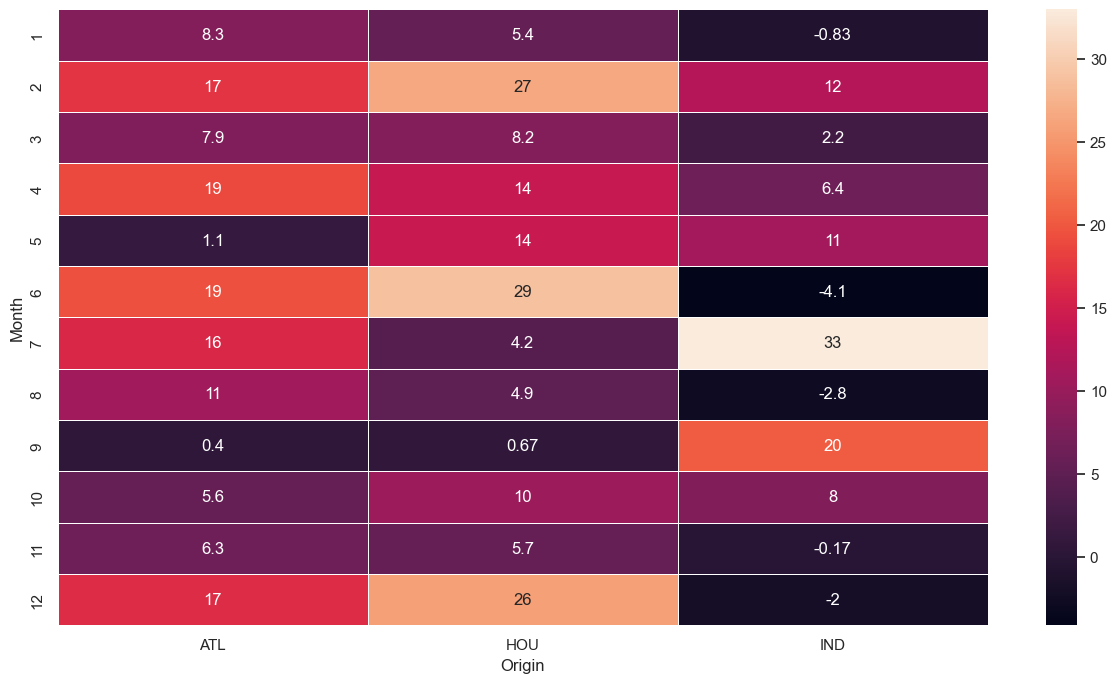

In [15]:
sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(data = data, annot= True, linewidths=.5)